## Case Study

### Case Details
The linked spreadsheet has monthly time series order and payment history of purchase by the small merchant from a  single supplier. Let’s assume these small merchants buy from many suppliers, but we only selected this particular supplier to offer credit to their merchants. Let’s also assume purchase history here reflects not more than 25%  of these merchant’s overall purchases. The objective of the exercise is  not necessarily to come up with a precise answer but to rather understand the candidate’s thought analytical thinking process. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [317]:
orders = pd.read_excel('Copy of Data Science Case.xlsx', header=2)
payments = pd.read_excel('Copy of Data Science Case.xlsx', sheet_name=1, header=1)

In [318]:
orders.set_index('Store #', inplace=True)
orders.rename(columns={'Unnamed: 1': 'Month #0'}, inplace=True)
payments.set_index('Store #', inplace=True)
payments.rename(columns={'Unnamed: 1': 'Month #0'}, inplace=True)

### Tables

In [319]:
orders

,Month #0,Month #1,Month #2,Month #3,Month #4,Month #5,Month #6,Month #7,Month #8,Month #9,Month #10,Month #11,Month #12
Store #,,,,,,,,,,,,,
1,2023,2084,2056,2220,2265,2332,2216,2194,2303,2142,1928,1774,1614
2,3452,3521,3451,3796,3872,4104,3817,3778,4081,3673,3471,3527,3414
3,2845,2817,2901,3336,2518,2769,1760,1742,1864,1808,1444,1473,1517
4,3133,3196,3153,3279,3344,3612,3431,3397,3845,3394,3564,3635,3744
5,3798,3836,4143,4226,4860,4811,4591,4738,4833,4447,4891,5136,5393


In [320]:
payments

,Month #0,Month #1,Month #2,Month #3,Month #4,Month #5,Month #6,Month #7,Month #8,Month #9,Month #10,Month #11,Month #12
Store #,,,,,,,,,,,,,
1,2023,2146,2056,2220,2263,2331,2149,2128,2234,2060,1677,1437,1002
2,3452,3169,3209,3302,3794,3652,3435,3287,3958,3305,3008,3296,3381
3,2845,2817,2901,3336,2518,2769,1760,1742,1864,1808,1444,1473,1517
4,3133,3036,2680,3279,3244,3287,3122,3261,3729,2749,2851,2944,3220
5,3798,3798,4060,4014,5103,4474,4499,4596,4494,4714,4745,4931,5501


>We can see, that values for "Month \#0" in both orders and payments tables are equal. We can assume that **at zero point** a credit line was opened for these stores. I will refer it as the **baseline** value.

### Exploratory visualizations

In [379]:
#reusable codes:
def viz():
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('months')
    plt.xticks(ticks = np.arange(0,13), labels=np.arange(0,13))
    plt.xlim(0,12)
    plt.grid(alpha=0.3)

c='#2492d6'
c1='#0063a1'
c2 = '#fc4747'

credit = orders - payments

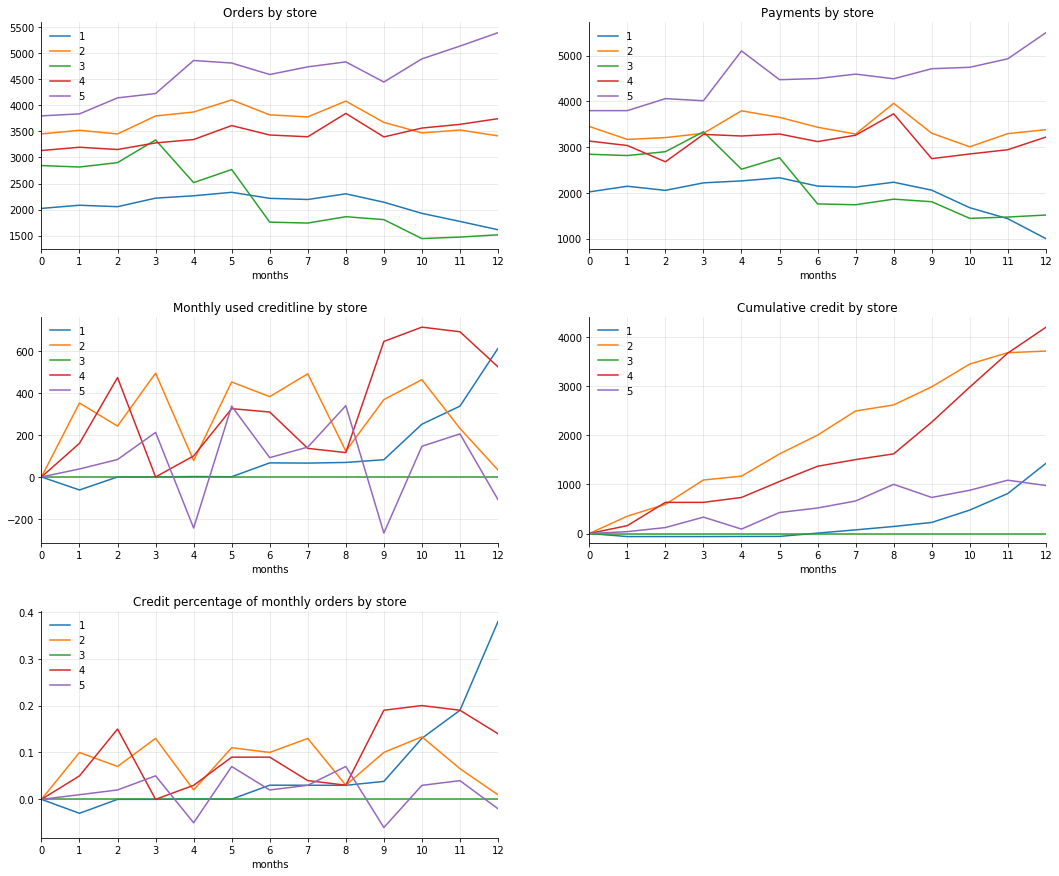

In [393]:
plt.figure(figsize=(18,15))


ax1 = plt.subplot(3,2,1, title='Orders by store')
ax1.plot(orders.T)
plt.legend(orders.index, frameon=False)
viz()

ax2 = plt.subplot(3,2,2, title='Payments by store')
ax2.plot(payments.T)
plt.legend(payments.index, frameon=False)
viz()

ax3 = plt.subplot(3,2,3, title='Monthly used creditline by store')
ax3.plot(credit.T)
plt.legend(payments.index, frameon=False)
viz()

ax4 = plt.subplot(3,2,4, title='Cumulative credit by store')
ax4.plot(np.cumsum(credit.T))
plt.legend(payments.index, frameon=False)
plt.ylim(bottom=-200)
viz()

ax5 = plt.subplot(3,2,5, title='Credit percentage of monthly orders by store')
plt.plot((credit.T)/orders.T)
plt.legend(payments.index, frameon=False)
viz()

plt.tight_layout
plt.subplots_adjust(hspace=0.3)
plt.savefig('Summary_1.png')
print()
plt.show();

>We can see, that store \#3 did not use its credit line. 

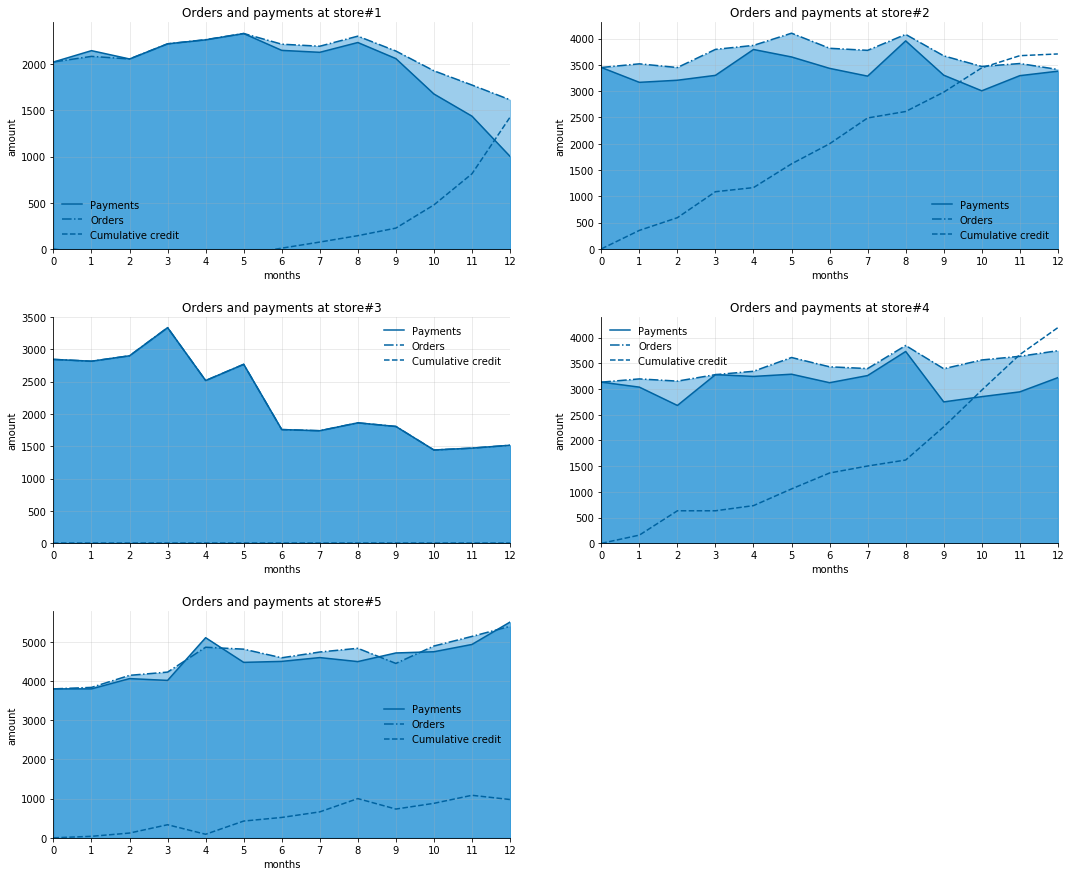

In [391]:
plt.figure(figsize=(18,15))


for i in range(1,6):
    ax = plt.subplot(3,2,i)
    plt.plot(payments.T[i].values, ls='-', color=c1, label='Payments')
    plt.plot(orders.T[i].values, ls='-.', color=c1, label="Orders")
    plt.plot(np.cumsum(orders.T[i]-payments.T[i]), color=c1, ls='--', label='Cumulative credit')
    
    ax.fill_between(np.arange(13), payments.T[i].values, color=c, alpha=0.65)
    ax.fill_between(np.arange(13), orders.T[i].values, color=c, alpha=0.45)
    
    viz()
    plt.title(f'Orders and payments at store#{i}')
    plt.ylim(bottom=0)
    plt.ylabel('amount')
    plt.legend(frameon=False)

# plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('Summary_2.png')
print()
plt.show();

>This visualization integrates all the above visulaizations in one summary chart: we can see here for every store the payments amount, the order amount and the cumulative credit amount.

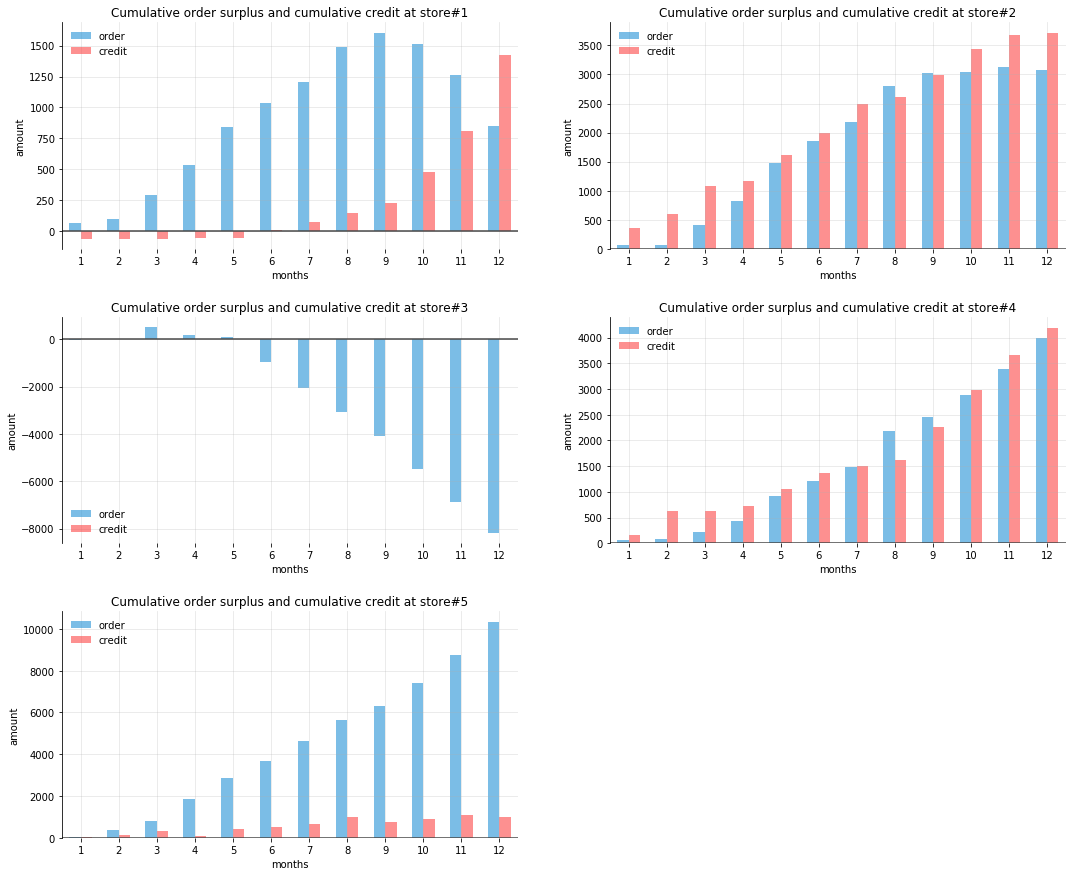

In [390]:
plt.figure(figsize=(18,15))

for i in range(1,6):
    ax = plt.subplot(3,2,i)
    data1 = np.cumsum(np.array(orders.T[i][1:])-orders.T[i][0]) #cumulated order surplus
    data2 = np.cumsum(credit_used.T[i].values[1:]) #cumulated credit amount
    plt.bar(np.arange(1,13)-0.15, data1, color=c, alpha=0.6, width=0.3, label='order')
    plt.bar(np.arange(1,13)+0.15, data2, color=c2, alpha=0.6, width=0.3, label='credit')
    plt.axhline(y=0, color='#474747')
    viz()
    plt.title(f'Cumulative order surplus and cumulative credit at store#{i}')
    plt.ylabel('amount')
    plt.xlim(left=0.5, right=12.5)
    plt.gca().spines['bottom'].set_visible(False)
    plt.legend(frameon=False)

plt.subplots_adjust(hspace=0.3)
print()
plt.savefig('Summary_3.png')
plt.show();

>This bar chart visualization shows us the cumulative order surplase compared to the baseline (zero point) align with the cumulative credit amount. If the amount goes to negative it means that the order even did not reach the baseline.

### 1. Problem
Which outlet will most likely have the highest stock-outs without credit? (Stock outs happen when merchants don’t have enough cash to purchase inventory to meet demand for the products they sell)

>Answer: **Store \#1** or **Store \#4**. To answer this question I calculated the difference of orders and payments, which is financed probably with a credit line. If we stop giving out more credit, probably Store \#1 will have the highest stock-outs:  its credit amount for the last month is the highest, and the gap between orders and payments was steadily growing in the last few of months. In case of other stores the gap is smaller, and there is now growing trend for the last couple of months. But if we say, we would not have given any credit for these outlets, than we should calculate the cumulative credit, and this amount was highest in case of Store \#4. It means, that this store financed the biggest stock with credit.

### 2. Problem 
Which outlet will most likely have an increase in sales with credit?

>Answer: **Store \#4**. To answer this question I created a bar chart visualization that compares the cumulated order surplus (order minus baseline at zero point) align with the cumulated credit amount. Store \#3 was not able to increase its order amount compared to the baseline at zero point. Store \#5 was able to increase it, but this store did not use the credit line to finance its growth. Store \#2 was able to increase its order up to a certain point after which the growth stopped however its credit line usage increased. In case of Store \#4 we can see a strong correlation between the credit line and order increase which was steadily growing.

### 3. Problem
Which outlet will not likely to increase in sales with credit because of lack of demand?


>Answer: **Store \#3**. I created a summary visualization, where it was visible, that the store \#3 after a little increase in its order started to drop but without using the credit line. The decline in order in this case was more probably because of the lack of demand than the lack of cash. In case of store \#1 the cause of decline is more ambiguous: although it was able to grow without using credit line, after 5 months the orders started to decline, however the store started to use its credit line. This behavior might be a sign of financial problems too. 